In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [2]:
data = pd.read_csv("C:/Users/Acer/JUPYTER/Assignments/5.Multi Linear Regression/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data1=data.rename(columns ={'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'}, inplace =False)

In [5]:
data1[data1.duplicated()]

,RD,AD,MS,State,Profit


No Duplicate data found

In [6]:
data1.describe()

,RD,AD,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data1=data1.drop(['State'], axis = 1)

In [8]:
data1.isna().sum()

RD        0
AD        0
MS        0
Profit    0
dtype: int64

# Correlation Matrix

In [9]:
data1.corr()

,RD,AD,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


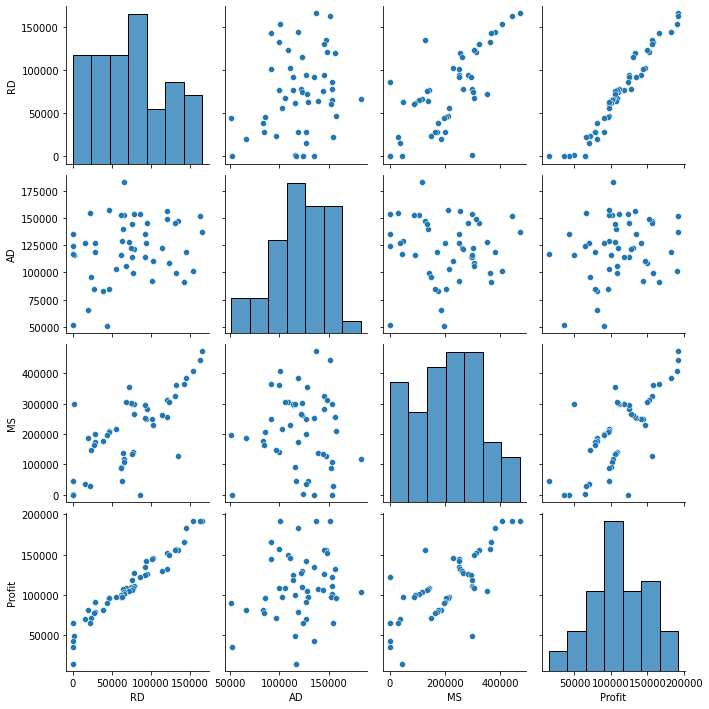

In [10]:
sns.pairplot(data1)

# Preparing a model

In [11]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+AD+MS',data=data1).fit()

In [12]:
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [13]:
model.pvalues, model.tvalues

(Intercept    1.057379e-09
 RD           2.634968e-22
 AD           6.017551e-01
 MS           1.047168e-01
 dtype: float64,
 Intercept     7.626218
 RD           17.846374
 AD           -0.525507
 MS            1.655077
 dtype: float64)

In [14]:
model.rsquared , model.rsquared_adj  

(0.9507459940683246, 0.9475337762901719)

## Simple Linear Regression Models

In [15]:
slr_a=smf.ols('Profit~AD',data=data1).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [16]:
slr_m=smf.ols("Profit~MS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [17]:
# Multilinear Regression 
mlr_am=smf.ols("Profit~AD+MS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

## Calculating VIF

In [18]:
rsq_r=smf.ols("RD~AD+MS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("AD~RD+MS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RD+AD",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','AD','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

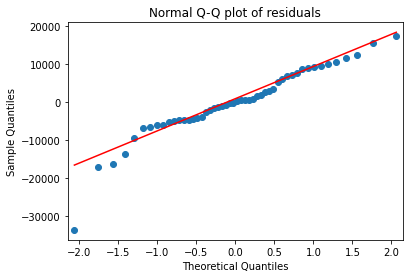

In [19]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [21]:
list(np.where(model.resid>30000))

[array([], dtype=int64)]

## Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values(vals) : 
    return (vals - vals.mean())/vals.std()

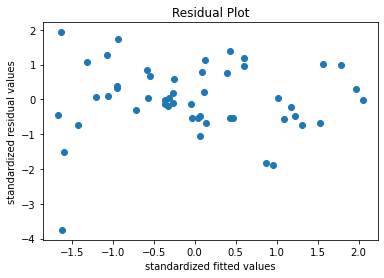

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


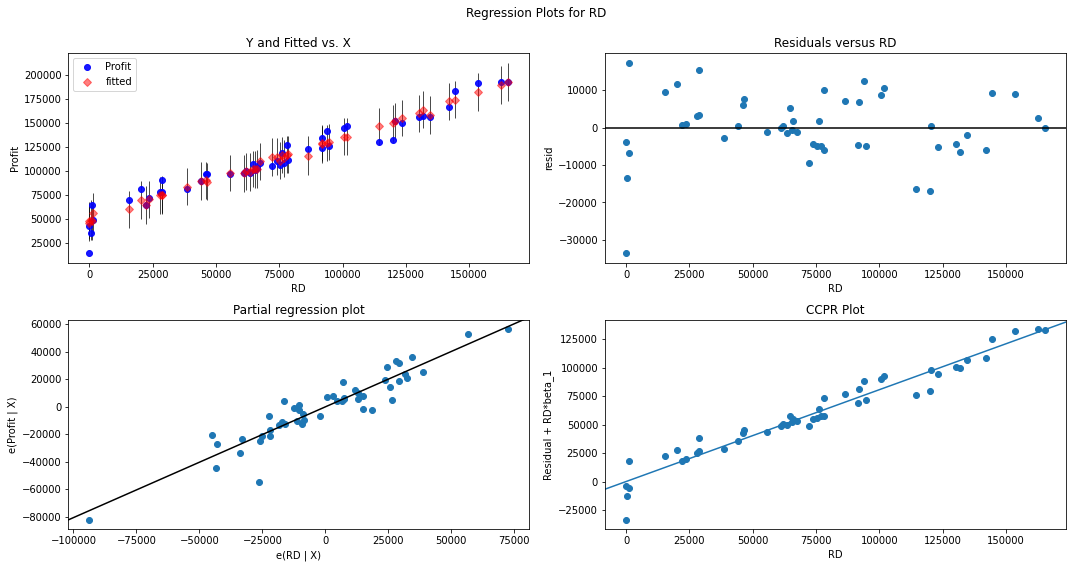

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

eval_env: 1


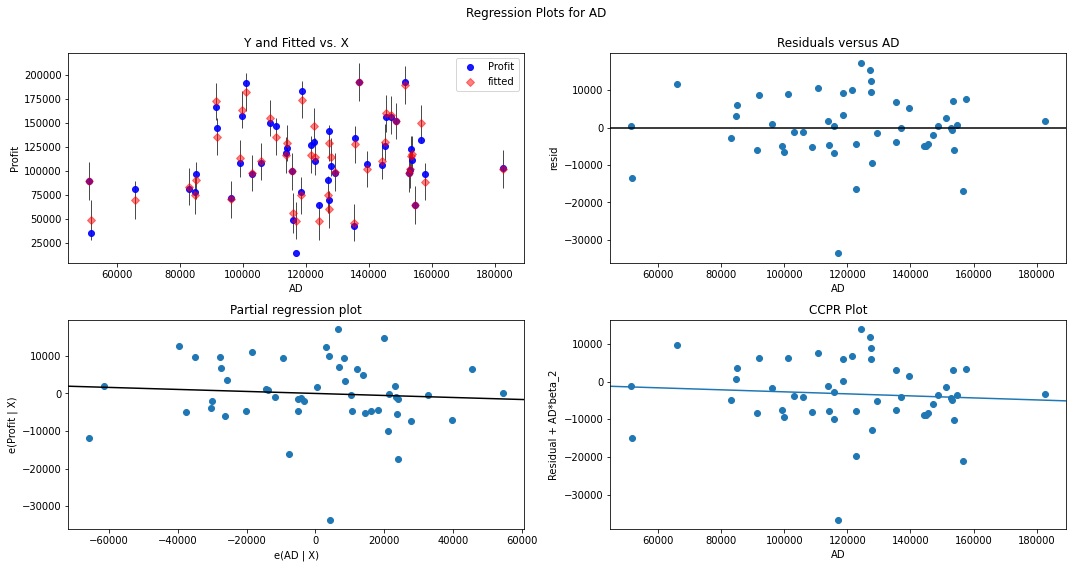

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()

eval_env: 1


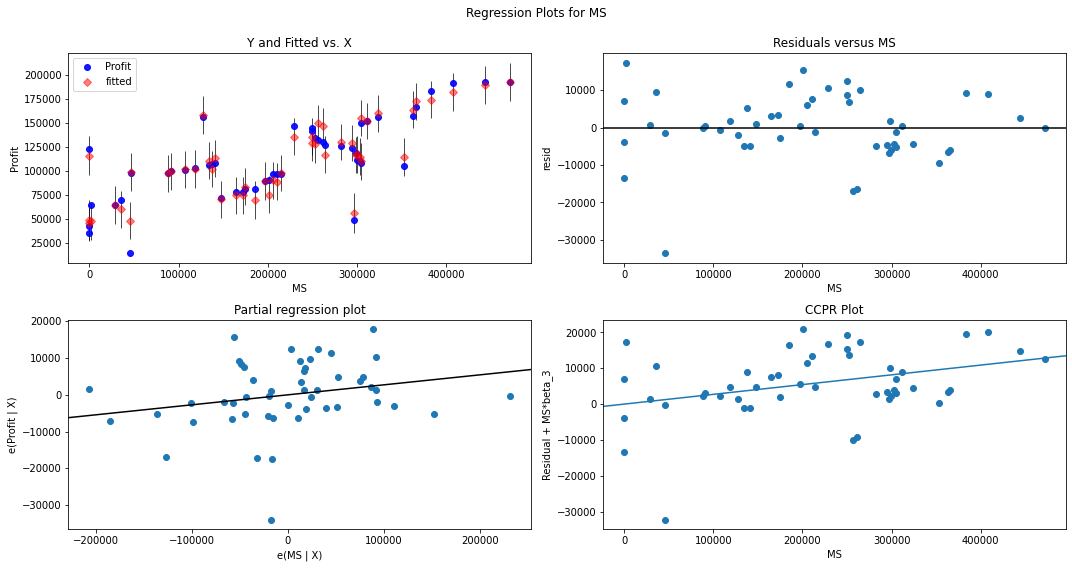

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

## Model Deletion Diagnostics (Detecting Influencers/Outliers)

## Cook’s Distance


In [27]:
(c,_)=model.get_influence().cooks_distance

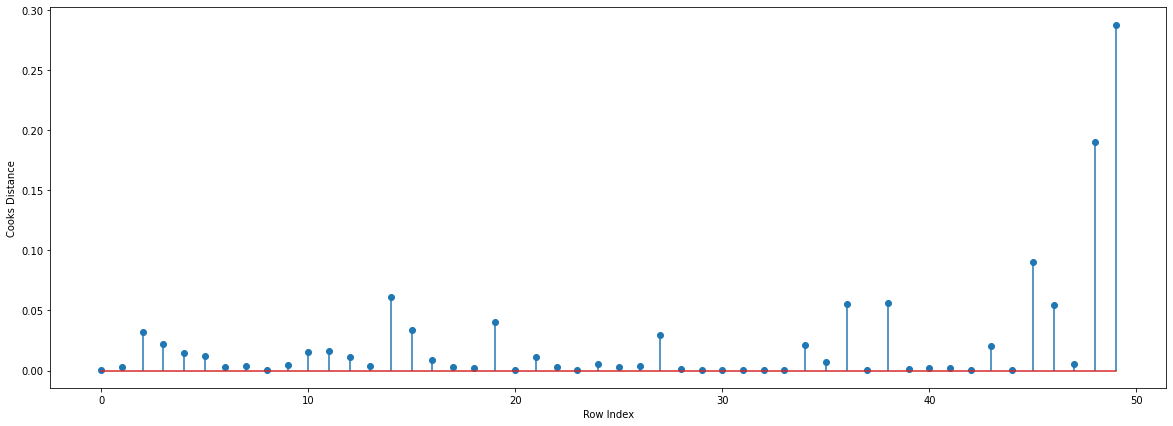

In [28]:
#stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

## High Influence points

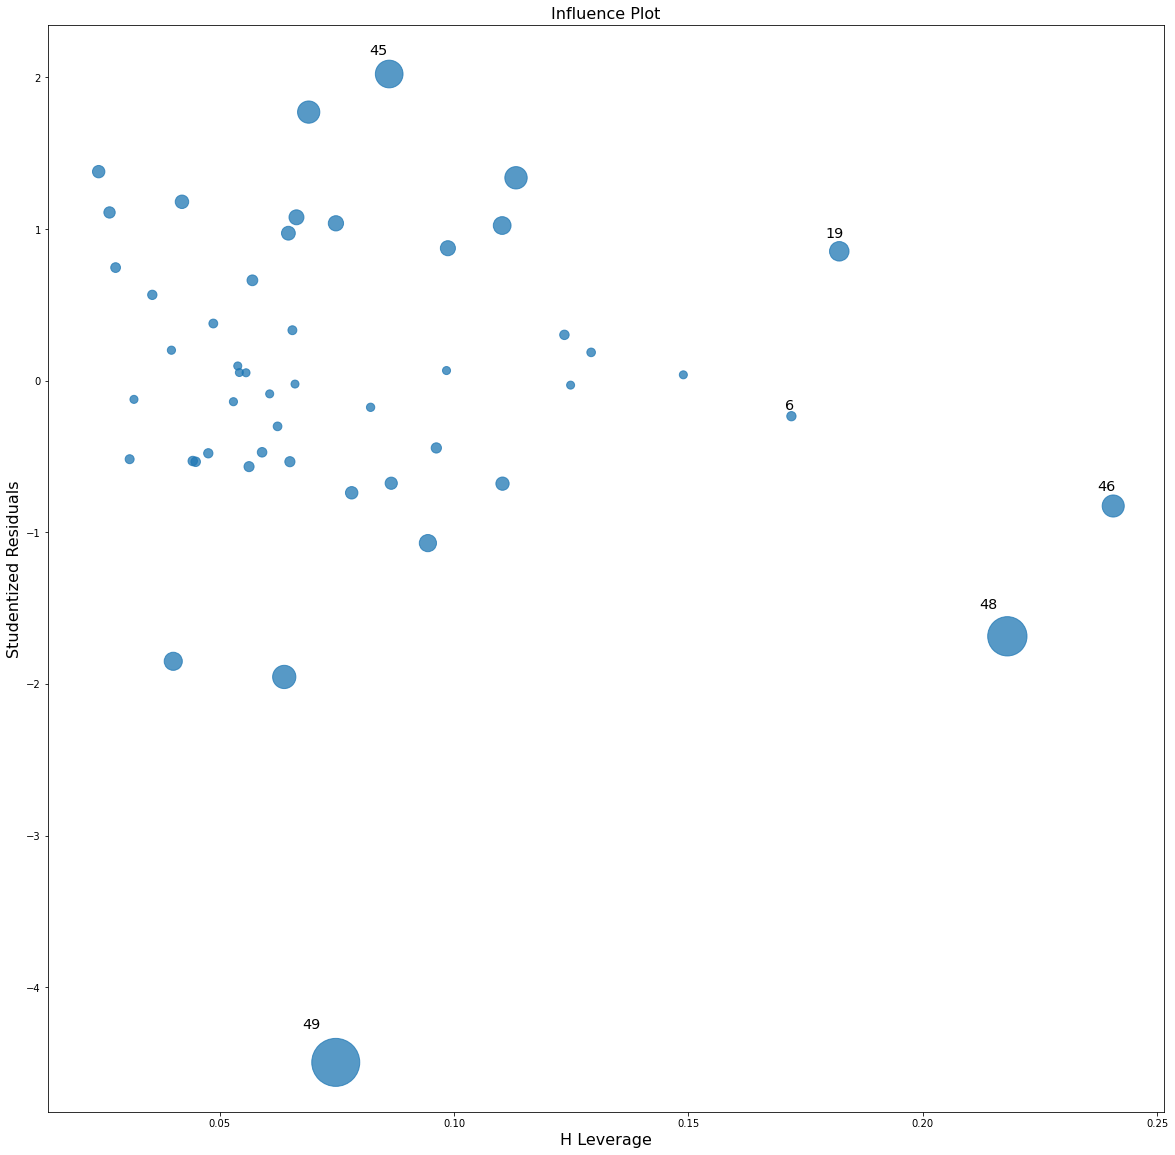

In [30]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [31]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [32]:
data1[data1.index.isin([49])] 

,RD,AD,MS,Profit
49,0.0,116983.8,45173.06,14681.4


## Improving the Model


In [33]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.head()

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Model Deletion Diagnostics and Final Model

In [34]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RD+AD+MS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RD+AD+MS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129848


In [35]:
final_model.rsquared


0.9613162435129848

In [36]:
data2

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Predicting For the New Data

In [37]:
new_data=pd.DataFrame({'RD':165444,"AD":90000,"MS":300000},index=[1])
new_data

,RD,AD,MS
1,165444,90000,300000


In [38]:
model.predict(new_data)

1    189177.895993
dtype: float64

In [39]:
final_model.predict(data2.iloc[0:5,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64

In [40]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

### R^2 value for each prepared model

In [41]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
